In [69]:
import numpy as np
import matplotlib as plt
import csv
import json
import pandas as pd
import pymongo
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Which visualizations/tools do we want for this?

1. A price estimater, where you enter in desired qualities of an apartment, and we return an estimated price for this apartment.

2. A tool to determine whether listings are over or underpriced, based upon the factors you enter (actually, just enter a craigslist listing, and we return a determination of over/underpricing, and the degree.

3. An analysis of what factors influence prices: of when you control for other things, how much does distance to campus affect pricing? Square footage? Time since original posting? Number of images in the listing? Which of these factors is the most influentials (how to measure that - research? 




In [27]:
def generateCurrentCSV():
    collection = pymongo.MongoClient().HousingListings.listings
    listings = [listing for listing in collection.find()]
    for el in listings:
        del el['_id']
        del el['link']
        del el['description']
    
    with open("listings.csv", 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=listings[0].keys())
        writer.writeheader()
        for el in listings:
            writer.writerow(el)

In [52]:
generateCurrentCSV()

In [62]:
cv = pd.read_csv("listings.csv")
cv['price'].as_matrix()


1555

<class 'numpy.ndarray'>


(array([  2.06400000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  5.00000000e+01,   3.60044500e+06,   7.20084000e+06,
          1.08012350e+07,   1.44016300e+07,   1.80020250e+07,
          2.16024200e+07,   2.52028150e+07,   2.88032100e+07,
          3.24036050e+07,   3.60040000e+07]),
 <a list of 10 Patch objects>)

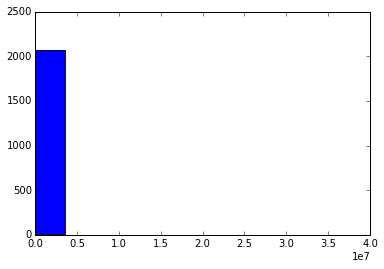

In [94]:
def histogramOfPrices():
    cv = pd.read_csv("listings.csv")
    #f = [int(price) for price in cv['price'].tolist()]
    curr = cv['price'].as_matrix()
    l = np.array([el for el in curr])
    print(type(l))
    return plt.hist(l)#cv['price'].as_matrix())
    
histogramOfPrices()



<class 'numpy.ndarray'>


(array([   5.,    5.,    9.,    8.,   16.,   21.,   29.,   37.,   42.,
          53.,   76.,  104.,  124.,  191.,  180.,  253.,  276.,  336.,
         369.,  388.,  427.,  461.,  493.,  513.,  554.,  517.,  507.,
         457.,  468.,  439.,  429.,  356.,  328.,  270.,  274.,  205.,
         149.,  159.,  111.,   94.,   75.,   54.,   42.,   34.,   21.,
          16.,   10.,    6.,    7.,    2.]),
 array([  50.28597794,   52.26617655,   54.24637516,   56.22657377,
          58.20677238,   60.186971  ,   62.16716961,   64.14736822,
          66.12756683,   68.10776544,   70.08796405,   72.06816266,
          74.04836127,   76.02855988,   78.00875849,   79.9889571 ,
          81.96915572,   83.94935433,   85.92955294,   87.90975155,
          89.88995016,   91.87014877,   93.85034738,   95.83054599,
          97.8107446 ,   99.79094321,  101.77114183,  103.75134044,
         105.73153905,  107.71173766,  109.69193627,  111.67213488,
         113.65233349,  115.6325321 ,  117.61273071,  11

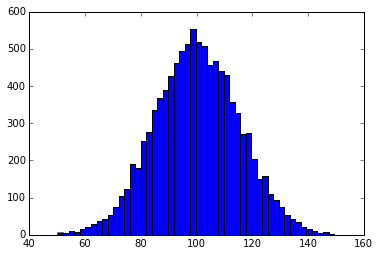

In [93]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
print(type(x))
plt.hist(x, 50)